In [1]:
import math
import numpy as np
from time import time
import scipy


from matplotlib import cm


from sklearn import svm
from scipy.spatial.distance import pdist, squareform
from sklearn.metrics.pairwise import rbf_kernel
from sklearn.metrics.pairwise import pairwise_kernels


from distributions.synthetic_distributions import TestDistribution

#import importlib
#importlib.reload(some_module)

import matplotlib.pyplot as plt

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

from numpy import where
from numpy import meshgrid
from numpy import arange
from numpy import hstack
from sklearn.datasets import make_blobs
from sklearn.linear_model import LogisticRegression
from matplotlib import pyplot
from SKLR import SKSVM

In [36]:
n_train=1024
n_test=5000
d=1000

distribution=TestDistribution(dim=d,index=2).returnDistribution()
X_train,Y_train=distribution.sampling(n_train)


X_test,Y_test=distribution.sampling(n_test)


## Plot of Decision Surface

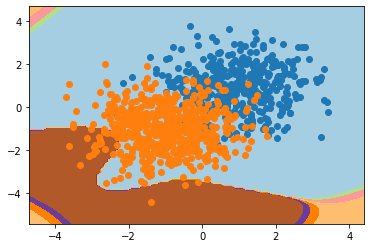

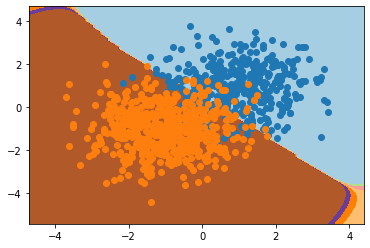

In [79]:
# decision surface for SKLR on a binary classification dataset
from numpy import where
from numpy import meshgrid
from numpy import arange
from numpy import hstack
from sklearn.datasets import make_blobs
from sklearn.linear_model import LogisticRegression
from matplotlib import pyplot
from SKLR import SKSVM
# generate dataset
n_train=1000
d=2
distribution=TestDistribution(dim=d,index=1).returnDistribution()
X,y=distribution.sampling(n_train)


# define bounds of the domain
min1, max1 = X[:, 0].min()-1, X[:, 0].max()+1
min2, max2 = X[:, 1].min()-1, X[:, 1].max()+1
# define the x and y scale
x1grid = arange(min1, max1, 0.1)
x2grid = arange(min2, max2, 0.1)
# create all of the lines and rows of the grid
xx, yy = meshgrid(x1grid, x2grid)
# flatten each grid to a vector
r1, r2 = xx.flatten(), yy.flatten()
r1, r2 = r1.reshape((len(r1), 1)), r2.reshape((len(r2), 1))
# horizontal stack vectors to create x1,x2 input for the model
grid = hstack((r1,r2))
# define the model
model = SKSVM(sketch_method="SubsamplingSketch", sketch_dimension=20)
# fit the model
model.fit_check(X,y)

# make predictions for the grid
yhat_1, yhat_2 = model.predict_check(grid)


# reshape the predictions back into a grid
zz = yhat_1.reshape(xx.shape)
# plot the grid of x, y and z values as a surface
pyplot.contourf(xx, yy, zz, cmap='Paired')
# create scatter plot for samples from each class
for class_value in range(2):
	# get row indexes for samples with this class
	row_ix = where(y == 2*class_value-1)
	# create scatter of these samples
	pyplot.scatter(X[row_ix, 0], X[row_ix, 1], cmap='Paired')
# show the plot
pyplot.show()


# reshape the predictions back into a grid
zz = yhat_2.reshape(xx.shape)
# plot the grid of x, y and z values as a surface
pyplot.contourf(xx, yy, zz, cmap='Paired')
# create scatter plot for samples from each class
for class_value in range(2):
	# get row indexes for samples with this class
	row_ix = where(y == 2*class_value-1)
	# create scatter of these samples
	pyplot.scatter(X[row_ix, 0], X[row_ix, 1], cmap='Paired')
# show the plot
pyplot.show()

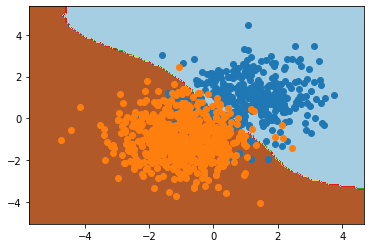

In [78]:
# decision surface for SVC on a binary classification dataset
from numpy import where
from numpy import meshgrid
from numpy import arange
from numpy import hstack
from sklearn.datasets import make_blobs
from sklearn.linear_model import LogisticRegression
from matplotlib import pyplot
# generate dataset
n_train=1000
distribution=TestDistribution(dim=d,index=1).returnDistribution()
X,y=distribution.sampling(n_train)


# define bounds of the domain
min1, max1 = X[:, 0].min()-1, X[:, 0].max()+1
min2, max2 = X[:, 1].min()-1, X[:, 1].max()+1
# define the x and y scale
x1grid = arange(min1, max1, 0.1)
x2grid = arange(min2, max2, 0.1)
# create all of the lines and rows of the grid
xx, yy = meshgrid(x1grid, x2grid)
# flatten each grid to a vector
r1, r2 = xx.flatten(), yy.flatten()
r1, r2 = r1.reshape((len(r1), 1)), r2.reshape((len(r2), 1))
# horizontal stack vectors to create x1,x2 input for the model
grid = hstack((r1,r2))
# define the model
model_SVC=svm.SVC(tol=1e-4)
model_SVC.fit(X,y)
# make predictions for the grid
yhat = model_SVC.predict(grid)
# reshape the predictions back into a grid
zz = yhat.reshape(xx.shape)
# plot the grid of x, y and z values as a surface
pyplot.contourf(xx, yy, zz, cmap='Paired')
# create scatter plot for samples from each class
for class_value in range(2):
	# get row indexes for samples with this class
	row_ix = where(y == 2*class_value-1)
	# create scatter of these samples
	pyplot.scatter(X[row_ix, 0], X[row_ix, 1], cmap='Paired')
# show the plot
pyplot.show()

## comparison of time and accuracy

In [1]:
from SKLR import SKSVM
import numpy as np
from distributions.synthetic_distributions import TestDistribution
from time import time

In [30]:
n_train=10000
n_test=2000
d=2
sketch_dim=100
distribution=TestDistribution(dim=d,index=1).returnDistribution()
X_train,Y_train=distribution.sampling(n_train)

Y_prob=distribution.class_probability(X_train)

X_test,Y_test=distribution.sampling(n_test)


In [31]:
time_start=time()
model=SKSVM(sketch_method="SRHT", sketch_dimension=sketch_dim)
model.fit(X_train,Y_train)
pre_probability=model.predict(X_test)
time_end=time()
print(time_end-time_start)

19.77788233757019


In [32]:
# check
time_start=time()
model=SKSVM(sketch_method="SRHT", sketch_dimension=sketch_dim,if_jit=False)
model.fit(X_train,Y_train)
pre_probability=model.predict(X_test)
time_end=time()
print(time_end-time_start)

25.985907316207886


In [33]:
time_start=time()
model=SKSVM(sketch_method="SubsamplingSketch", sketch_dimension=sketch_dim,if_jit=False)
model.fit(X_train,Y_train)
pre_probability=model.predict(X_test)
time_end=time()
print(time_end-time_start)

100
2.1478278636932373


In [34]:
# test error
((2*(pre_probability.ravel()>0.5)-1)==Y_test).mean()

0.8615

In [35]:
# bayes error
(distribution.class_probability(X_test).max(axis=1)).mean()

0.92576519120988

In [36]:
from sklearn import svm
time_start=time()
model_SVC=svm.SVC(tol=1e-3,probability=True)
model_SVC.fit(X_train,Y_train)

prediction_SVC=model_SVC.predict(X_test)

time_end=time()
print(time_end-time_start)

4.779992580413818


In [37]:
((2*(prediction_SVC.ravel()>0.5)-1)==Y_test).mean()


0.9245

In [38]:
model.iteration_

3

## Real Data

### MNIST

In [1]:
from data.mnist import mnist




In [2]:

X_train, Y_train, X_test, Y_test = mnist.load()

In [4]:
from sklearn import svm
from time import time
time_start=time()
model_SVC=svm.SVC()
model_SVC.fit(X_test, Y_test)

prediction_SVC=model_SVC.predict(X_train)

time_end=time()
print(time_end-time_start)

68.3587498664856


In [7]:
(prediction_SVC==Y_train).mean()

0.9881

In [8]:
prediction_SVC=model_SVC.predict(X_train)

### LIBSVM

In [ ]:
import dsdl


dataset_vec_notest=['australian_scale','breast-cancer_scale','colon-cancer','covtype.binary.scale','diabetes_scale', 'fourclass_scale' 'german.numer_scale', 'heart_scale', 'ionosphere', 'mushrooms', 'news20.binary', 'phishing', 'real-sim', 'skin_nonskin', 'sonar', 'abalone', 'abalone_scale', 'bodyfat', 'bodyfat_scale', 'cadata', 'cpusmall', 'cpusmall_scale',  'yacht', 'boston-housing', 'california-housing', 'concrete', 'energy', 'naval-propulsion', 'power-plant', 'digits', 'faithful']
dataset_vec_withtest=['cod-rna', 'gisette', 'leukemia', 'madelon','rcv1.binary','splice', 'svmguide1', 'svmguide3', 'w1a', 'w2a', 'w3a', 'w4a', 'w5a', 'w6a', 'w7a', 'w8a']

for dataset in dataset_vec_notest:
    ds = dsdl.load(dataset)
    X, Y = ds.get_train()
    X_train, X_test, Y_train, Y_test = train_test_split(X,Y, train_size=0.7, test_size=0.3)
    
for dataset in dataset_vec_withtest:
    ds = dsdl.load(dataset)
    X_train, Y_train = ds.get_train()
    
    X_test, Y_test = ds.get_test()

In [ ]:
time_start=time()
model=SKSVM(sketch_method="SubsamplingSketch", sketch_dimension=sketch_dim,if_jit=False)
model.fit(X_train,Y_train)
pre_probability=model.predict(X_test)
time_end=time()
print(time_end-time_start)

In [ ]:
time_start=time()
model=SKSVM(sketch_method="SRHT", sketch_dimension=sketch_dim)
model.fit(X_train,Y_train)
pre_probability=model.predict(X_test)
time_end=time()
print(time_end-time_start)

In [ ]:
time_start=time()
model_SVC=svm.SVC()
model_SVC.fit(X_test, Y_test)

prediction_SVC=model_SVC.predict(X_train)

time_end=time()
print(time_end-time_start)

## Parameter Analysis

### Gaussian Sketch

In [48]:
n_train=8000
n_test=1000
d=2
repeat_time=10

distribution=TestDistribution(dim=d,index=1).returnDistribution()
X_train,Y_train=distribution.sampling(n_train)


X_test,Y_test=distribution.sampling(n_test)

time_vec=[]
acc_vec=[]
sketch_dim_vec=[5,10,20,25,40,50,60,75,90,100,120,140,160,180,200,225,250,300,350,400,450,500,600,700,800]
for sketch_dim in sketch_dim_vec:
    time_temp=0
    acc_temp=0
    for _ in range(repeat_time):
        time_start=time()
        model=SKSVM(sketch_method="GaussianSketch", sketch_dimension=sketch_dim)
        model.fit(X_train,Y_train)
        pre_probability=model.predict(X_test)
        time_end=time()
        time_temp+=time_end-time_start
        acc_temp+=((2*(pre_probability.ravel()>0.5)-1)==Y_test).mean()
    time_vec.append(time_temp/repeat_time)
    acc_vec.append(acc_temp/repeat_time)

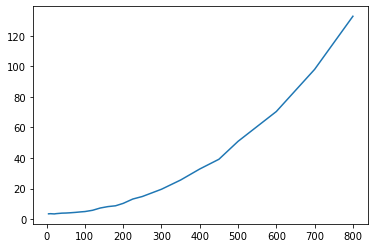

In [49]:
plt.plot(sketch_dim_vec,time_vec)

SVC(probability=True)

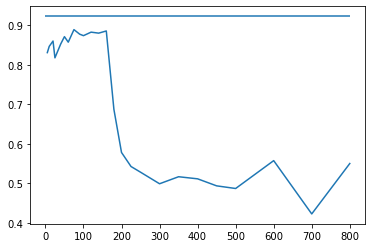

In [50]:
model_SVC=svm.SVC(tol=1e-3,probability=True)
model_SVC.fit(X_train,Y_train)

prediction_SVC=model_SVC.predict(X_test)


plt.plot(sketch_dim_vec,acc_vec)
plt.hlines((prediction_SVC==Y_test).mean(),0,800)

### Count Sketch

In [51]:
n_train=8000
n_test=1000
d=2
repeat_time=10

distribution=TestDistribution(dim=d,index=1).returnDistribution()
X_train,Y_train=distribution.sampling(n_train)


X_test,Y_test=distribution.sampling(n_test)

time_vec=[]
acc_vec=[]
sketch_dim_vec=[5,10,20,25,40,50,60,75,90,100,120,140,160,180,200,225,250,300,350,400,450,500,600,700,800]
for sketch_dim in sketch_dim_vec:
    time_temp=0
    acc_temp=0
    for _ in range(repeat_time):
        time_start=time()
        model=SKSVM(sketch_method="CountSketch", sketch_dimension=sketch_dim)
        model.fit(X_train,Y_train)
        pre_probability=model.predict(X_test)
        time_end=time()
        time_temp+=time_end-time_start
        acc_temp+=((2*(pre_probability.ravel()>0.5)-1)==Y_test).mean()
    time_vec.append(time_temp/repeat_time)
    acc_vec.append(acc_temp/repeat_time)

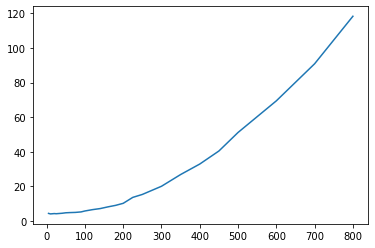

In [52]:
plt.plot(sketch_dim_vec,time_vec)

SVC(probability=True)

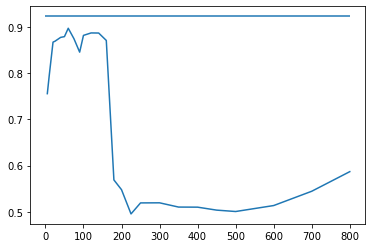

In [53]:
model_SVC=svm.SVC(tol=1e-3,probability=True)
model_SVC.fit(X_train,Y_train)

prediction_SVC=model_SVC.predict(X_test)


plt.plot(sketch_dim_vec,acc_vec)
plt.hlines((prediction_SVC==Y_test).mean(),0,800)

### Subsampling Sketch

In [45]:
n_train=8000
n_test=1000
d=2
repeat_time=10

distribution=TestDistribution(dim=d,index=1).returnDistribution()
X_train,Y_train=distribution.sampling(n_train)


X_test,Y_test=distribution.sampling(n_test)

time_vec=[]
acc_vec=[]
sketch_dim_vec=[5,10,20,25,40,50,60,75,90,100,120,140,160,180,200,225,250,300,350,400,450,500,600,700,800]
for sketch_dim in sketch_dim_vec:
    time_temp=0
    acc_temp=0
    for _ in range(repeat_time):
        time_start=time()
        model=SKSVM(sketch_method="SubsamplingSketch", sketch_dimension=sketch_dim)
        model.fit(X_train,Y_train)
        pre_probability=model.predict(X_test)
        time_end=time()
        time_temp+=time_end-time_start
        acc_temp+=((2*(pre_probability.ravel()>0.5)-1)==Y_test).mean()
    time_vec.append(time_temp/repeat_time)
    acc_vec.append(acc_temp/repeat_time)

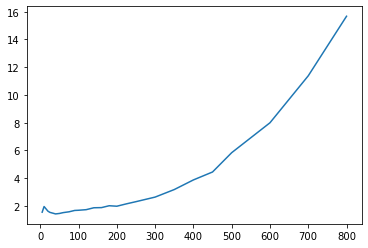

In [46]:
plt.plot(sketch_dim_vec,time_vec)

SVC(probability=True)

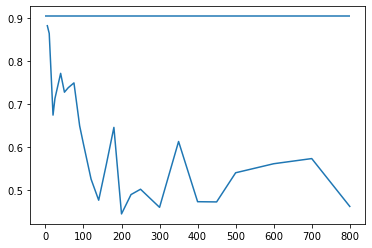

In [47]:
model_SVC=svm.SVC(tol=1e-3,probability=True)
model_SVC.fit(X_train,Y_train)

prediction_SVC=model_SVC.predict(X_test)


plt.plot(sketch_dim_vec,acc_vec)
plt.hlines((prediction_SVC==Y_test).mean(),0,800)

### SRHT Sketch

In [ ]:
n_train=8000
n_test=1000
d=2
repeat_time=10

distribution=TestDistribution(dim=d,index=1).returnDistribution()
X_train,Y_train=distribution.sampling(n_train)


X_test,Y_test=distribution.sampling(n_test)

time_vec=[]
acc_vec=[]
sketch_dim_vec=[5,10,20,25,40,50,60,75,90,100,120,140,160,180,200,225,250,300,350,400,450,500,600,700,800]
for sketch_dim in sketch_dim_vec:
    time_temp=0
    acc_temp=0
    for _ in range(repeat_time):
        time_start=time()
        model=SKSVM(sketch_method="SRHT", sketch_dimension=sketch_dim)
        model.fit(X_train,Y_train)
        pre_probability=model.predict(X_test)
        time_end=time()
        time_temp+=time_end-time_start
        acc_temp+=((2*(pre_probability.ravel()>0.5)-1)==Y_test).mean()
    time_vec.append(time_temp/repeat_time)
    acc_vec.append(acc_temp/repeat_time)

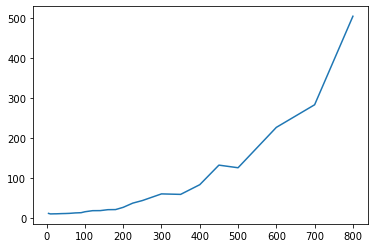

In [22]:
plt.plot(sketch_dim_vec,time_vec)

SVC(probability=True)

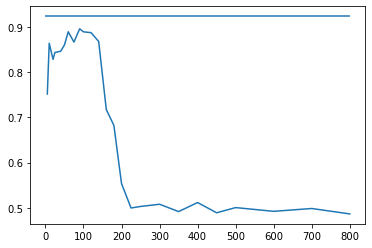

In [23]:
model_SVC=svm.SVC(tol=1e-3,probability=True)
model_SVC.fit(X_train,Y_train)

prediction_SVC=model_SVC.predict(X_test)


plt.plot(sketch_dim_vec,acc_vec)
plt.hlines((prediction_SVC==Y_test).mean(),0,800)

### Overparametrization

In [49]:
n_train=2000
n_test=1000
d=2
repeat_time=5

distribution=TestDistribution(dim=d,index=2).returnDistribution()
X_train,Y_train=distribution.sampling(n_train)


X_test,Y_test=distribution.sampling(n_test)

time_vec=[]
acc_vec=[]
sketch_dim_vec=[i for i in range(5,200,20)]
for sketch_dim in sketch_dim_vec:
    print(sketch_dim)
    time_temp=0
    acc_temp=0
    for _ in range(repeat_time):
        time_start=time()
        model=SKSVM(sketch_method="CountSketch", sketch_dimension=sketch_dim)
        model.fit(X_train,Y_train)
        pre_probability=model.predict(X_test)
        time_end=time()
        time_temp+=time_end-time_start
        acc_temp+=((2*(pre_probability.ravel()>0.5)-1)==Y_test).mean()
    time_vec.append(time_temp/repeat_time)
    acc_vec.append(acc_temp/repeat_time)

5
25
45
65
85
105
125
145
165
185


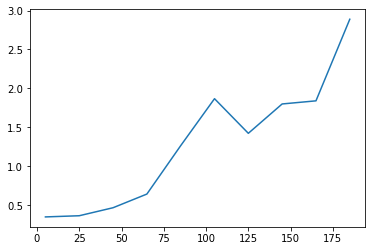

In [50]:
plt.plot(sketch_dim_vec,time_vec)

SVC(probability=True)

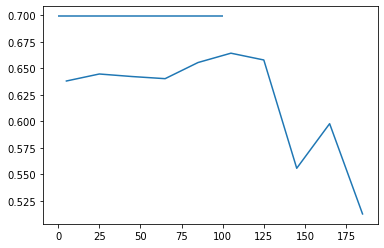

In [51]:
model_SVC=svm.SVC(tol=1e-3,probability=True)
model_SVC.fit(X_train,Y_train)

prediction_SVC=model_SVC.predict(X_test)


plt.plot(sketch_dim_vec,acc_vec)
plt.hlines((prediction_SVC==Y_test).mean(),0,100)

## Parameter Analysis for lambda

### Gaussian Sketch

In [48]:
n_train=4000
n_test=1000
d=2
repeat_time=10

distribution=TestDistribution(dim=d,index=1).returnDistribution()
X_train,Y_train=distribution.sampling(n_train)


X_test,Y_test=distribution.sampling(n_test)

time_vec=[]
acc_vec=[]
sketch_dim_vec=[5,10,20,25,40,50,60,75,90,100,120,140,160,180,200,225,250,300,350,400,450,500,600,700,800]
for lamda in sketch_dim_vec:
    time_temp=0
    acc_temp=0
    for _ in range(repeat_time):
        time_start=time()
        model=SKSVM(sketch_method="GaussianSketch", sketch_dimension=sketch_dim)
        model.fit(X_train,Y_train)
        pre_probability=model.predict(X_test)
        time_end=time()
        time_temp+=time_end-time_start
        acc_temp+=((2*(pre_probability.ravel()>0.5)-1)==Y_test).mean()
    time_vec.append(time_temp/repeat_time)
    acc_vec.append(acc_temp/repeat_time)

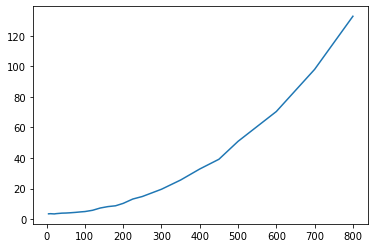

In [49]:
plt.plot(sketch_dim_vec,time_vec)

SVC(probability=True)

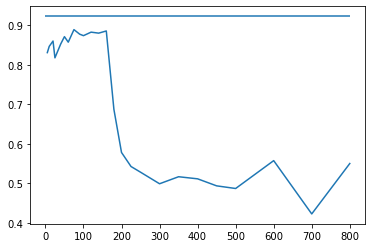

In [50]:
model_SVC=svm.SVC(tol=1e-3,probability=True)
model_SVC.fit(X_train,Y_train)

prediction_SVC=model_SVC.predict(X_test)


plt.plot(sketch_dim_vec,acc_vec)
plt.hlines((prediction_SVC==Y_test).mean(),0,800)